# on this page, there will be some explanations about ROC AUC curve for model evaluation compared to the Precision Recall Curv

## A) ROC AUC CURVE ( compared the balanced and imbalanced Dataset)

it is evaluation of Machine learning , predicting the outome based on feature based on different threshold

it is plotting the True positive Rate - Flse Positive Rate

means it shows how good our Model separates true and false Positive

it  shows as well how good at predicting positive  when the actual outcome is positive

true positive rate= TP / (TP+FN)

#### using Example Datasets

In [30]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score,roc_curve,f1_score,auc
from matplotlib import pyplot 

#### import dataset

In [3]:
X,y= make_classification(n_samples=1000,n_classes=2,random_state=1)

### Split test and Train

In [4]:
trainX,testX,trainy,testy= train_test_split(X,y,test_size=0.3,random_state=2)

### fitting and calculate the probability

In [32]:
ns_probs= [0 for _ in range(len(testy))]
model= LogisticRegression()
model.fit(trainX,trainy)
yhat= model.predict(testX)


In [31]:

## predict probabilty 
lr_probs= model.predict_proba(testX)[:,1]
lr_auc= roc_auc_score(testy,lr_probs)
nr_auc= roc_auc_score(testy,ns_probs)


#### summarize the score

In [13]:
print('no skills score is :',nr_auc)
print('the ROC score is :', lr_auc)

no skills score is : 0.5
the ROC score is : 0.9186186052713453


## 1A) ROC-AUC-Curve balanced dataset)

###  plot ROC AUC curve

In [16]:
ns_fpr,ns_tpr,_= roc_curve(testy,ns_probs)
lr_fpr, lr_tpr,_= roc_curve(testy,lr_probs)

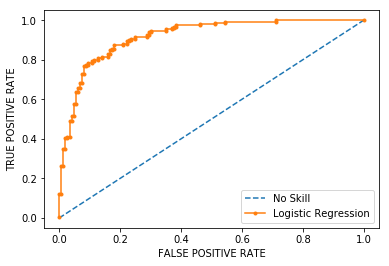

         ROC CURVE ON BALANCED DATASET


In [27]:
pyplot.plot(ns_fpr,ns_tpr, linestyle='--',label='No Skill')
pyplot.plot(lr_fpr,lr_tpr,marker= '.',label= 'Logistic Regression')
pyplot.xlabel('FALSE POSITIVE RATE')
pyplot.ylabel("TRUE POSITIVE RATE")
pyplot.legend()
pyplot.show()
print('         ROC CURVE ON BALANCED DATASET')

## 1B)  precision Recall Curve

#### caluclate the precision and recall

In [34]:
lr_precision,lr_recall,_= precision_recall_curve(testy,lr_probs)

#### calculate the f1 score

In [38]:
## lr probs is the probabilistic of the positive value using .proba (testx)
lr_f1,lr_auc= f1_score(testy,yhat), auc(lr_recall,lr_precision)

In [39]:
print('logistic regression  f1= {f1} , then the AUC is = {auc}'.format(f1= lr_f1,
                                                                      auc= lr_auc))

logistic regression  f1= 0.8338983050847457 , then the AUC is = 0.9111019785870931


### plot the PrecisionRecall curve ( Balanced Dataset)

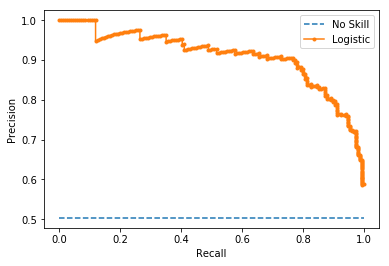

In [44]:
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 2A)plot both ROC and AUC for Imbalanced Datasets

In [52]:
X_imb, y_imb = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX_imb, testX_imb, trainy_imb, testy_imb = train_test_split(X_imb, y_imb, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs_imb = [0 for _ in range(len(testy_imb))]
# fit a model
model_imb = LogisticRegression(solver='lbfgs')
model_imb.fit(trainX_imb, trainy_imb)
## predicted data
yhat_imb = model_imb.predict(testX_imb)
# predict probabilities
lr_probs_imb = model_imb.predict_proba(testX_imb)
# keep probabilities for the positive outcome only
lr_probs_imb = lr_probs_imb[:, 1]
# calculate scores
ns_auc_imb = roc_auc_score(testy_imb, ns_probs_imb)
lr_auc_imb = roc_auc_score(testy_imb, lr_probs_imb)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc_imb))
print('Logistic: ROC AUC=%.3f' % (lr_auc_imb))


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


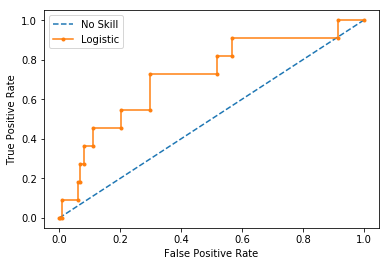

           ROC AUC CURVE FOR THE IMBALANCED DATASET


In [48]:
# calculate roc curves
ns_fpr_imb, ns_tpr_imb, _ = roc_curve(testy_imb, ns_probs_imb)
lr_fpr_imb, lr_tpr_imb, _ = roc_curve(testy_imb, lr_probs_imb)
# plot the roc curve for the model
pyplot.plot(ns_fpr_imb, ns_tpr_imb, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr_imb, lr_tpr_imb, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print('           ROC AUC CURVE FOR THE IMBALANCED DATASET')

## 2B) Precision-Recall Curve Imbalanced Dataset

In [53]:
lr_precision_imb, lr_recall_imb,_= precision_recall_curve(testy_imb,lr_probs_imb)
lr_f1_imb,lr_auc_imb= f1_score(testy_imb,yhat_imb), auc(lr_recall_imb,lr_precision_imb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


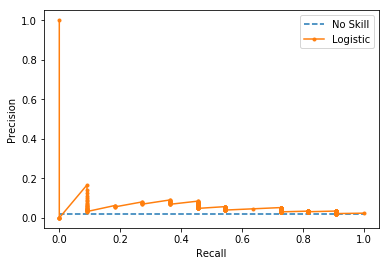

          Precision -Recall Curve IMBALANCED DATASET


In [55]:
no_skill = len(testy_imb[testy_imb==1]) / len(testy_imb)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall_imb, lr_precision_imb, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print('          Precision -Recall Curve IMBALANCED DATASET')